Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are <code>Erosion and Dilation</code>. Then its variant forms like <code>Opening, Closing, Gradient etc</code> also comes into play. We will see them one-by-one with help of following image:

1. <span style="background-color: #FFFF00">Erosion</span>:

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

#### <code>2. Dilation </code>
It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

#### <code>3. Opening</code>
Opening is just another name of erosion followed by dilation. It is useful in removing noise.

#### <code>4. Closing</code>
Closing is reverse of Opening, Dilation followed by Erosion. It is <span style="background-color: #FFFF00">useful in closing small holes inside the foreground objects, or small black points on the object </span>.

#### <code>5. Morphological Gradient</code>
It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

#### <code>6. Top Hat</code>
It is the difference between input image and Opening of the image.

#### <code>7. Black Hat</code>
It is the difference between the closing of the input image and input image.



In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

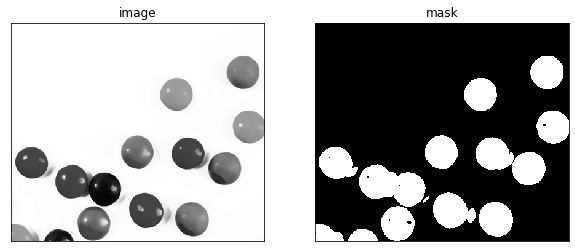

In [3]:
img = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)                              

titles = ['image', 'mask']
images = [img, mask]

plt.figure(figsize = (10,10))

for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### Note: As you can notice that in the mask image, some black dots are present inside the balls which can be removed using dilation property.

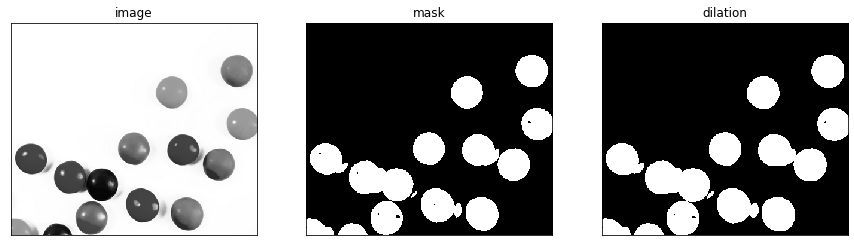

In [4]:

kernal = np.ones((2,2), np.uint8)
dilation = cv2.dilate(mask, kernal)

titles = ['image', 'mask', 'dilation']
images = [img, mask, dilation]

plt.figure(figsize = (15,15))

for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### Note: After dilation, still we are having some small black dots inside our balls so we can use two concept. (1) we can increase the number of iteration we want to perform. (2) Increase the size of the kernel

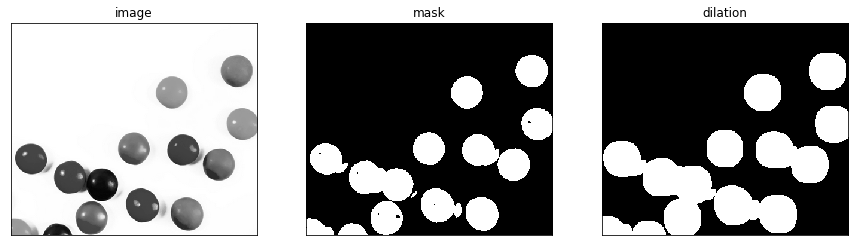

In [5]:

kernal = np.ones((5,5), np.uint8)
dilation = cv2.dilate(mask, kernal, iterations = 2)

titles = ['image', 'mask', 'dilation']
images = [img, mask, dilation]

plt.figure(figsize = (15,15))

for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### Note: As we increased our kernel size to (5,5) it leads to change in size of the ball. So use the kernel size carefully.

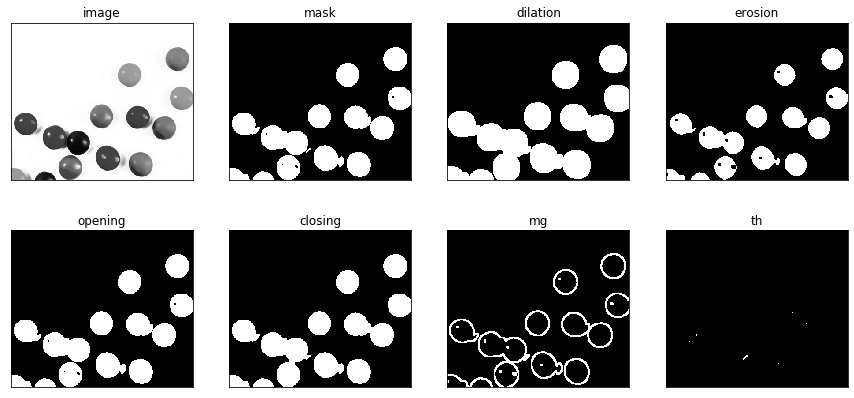

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/piyus/All programming files/Computer_Vision/data/smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)                              

kernal = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)
erosion = cv2.erode(mask, kernal, iterations=1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [img, mask, dilation, erosion, opening, closing, mg, th]

plt.figure(figsize = (15,7))
for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()